In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# to split the datasets
from sklearn.model_selection import train_test_split
# we use only the following variables for the demo:


cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [5]:
# let's load the House Prices dataset

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()
# let's check the null values
data.isnull().mean()
# let's separate into training and testing set

(1460, 10)


LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

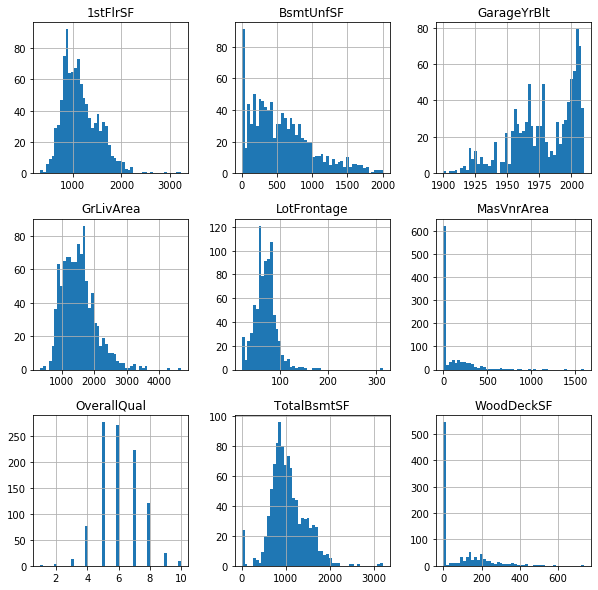

In [6]:
# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape, X_test
# let's check the misssing data again
X_train.isnull().mean()

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [7]:
# impute LotFrontage with the mean, and MasVnrArea and GarageYrBlt with the median,as those variables are quite skewed

# first we need to make lists, indicating which features
# will be imputed with each method

numeric_features_mean = ['LotFrontage']
numeric_features_median = ['MasVnrArea', 'GarageYrBlt']
preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', SimpleImputer(strategy='mean'), numeric_features_mean),
    ('median_imputer', SimpleImputer(strategy='median'), numeric_features_median)
], remainder='passthrough')

In [8]:
# now we fit the preprocessor
preprocessor.fit(X_train)
# we can explore the transformers like this:

preprocessor.transformers

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt'])]

In [9]:
# and we can corroborate the value with that one in
# the train set
X_train[numeric_features_mean].mean()
# and we corroborate those values in the train set
X_train[numeric_features_median].median()
# and now we can impute the data
X_train = preprocessor.transform(X_train)

# and check it worked
np.mean(np.isnan(X_train))
# now we impute the test data
# and now we can impute the test data
X_test = preprocessor.transform(X_test)

# and check it worked
np.mean(np.isnan(X_train))
np.mean(np.isnan(X_test))

0.0

Have a nice day!